In [4]:
%run ../includes/common-20230414.ipynb

CPython 2023-12-27T00:00:24.322763


CPU times: user 1.09 ms, sys: 0 ns, total: 1.09 ms
Wall time: 1.89 ms


In [60]:
resultfiles = {
    'Baleen': 'runs/example/baleen/prefetch_ml-on-partial-hit/ml-ap-0.798545_6_lru_366.475GB/full_0_0.1_cache_perf.txt.lzma',
    'RejectX': 'runs/example/rejectx/rejectx-ap-1_0.508154_lru_366.475GB/full_0_0.1_cache_perf.txt.lzma',
}

In [61]:
res = {}
for label, filename in resultfiles.items():
    res[label] = results.get({'Region': 'Region1', 'Filename':f'../../{filename}'})

Error: 'Prefetch-Range'
<class 'pandas.core.frame.DataFrame'>
Index(['Write Rate (MB/s)', 'IOPS Saved Ratio', 'Service Time Saved Ratio', 'Hit Rate (Hz)', 'AP Threshold', 'AP Probability', 'Cache Size (GB)', 'Wasted', 'Evictions', 'Filename',
       ...
       'WarmupTime', 'Prefetch Ratio', 'Completed', 'Region', 'ExperimentSuffix', 'ConfigFile', 'Target Cache Size', 'RegionLabel', 'RegionLabelOrig', 'AdmissionPolicyLabel'], dtype='object', length=461)
Error: 'Prefetch-Range'
<class 'pandas.core.frame.DataFrame'>
Index(['Write Rate (MB/s)', 'IOPS Saved Ratio', 'Service Time Saved Ratio', 'Hit Rate (Hz)', 'AP Threshold', 'AP Probability', 'Cache Size (GB)', 'Wasted', 'Evictions', 'Filename',
       ...
       'WarmupTime', 'Prefetch Ratio', 'Completed', 'Region', 'ExperimentSuffix', 'ConfigFile', 'Target Cache Size', 'RegionLabel', 'RegionLabelOrig', 'AdmissionPolicyLabel'], dtype='object', length=461)


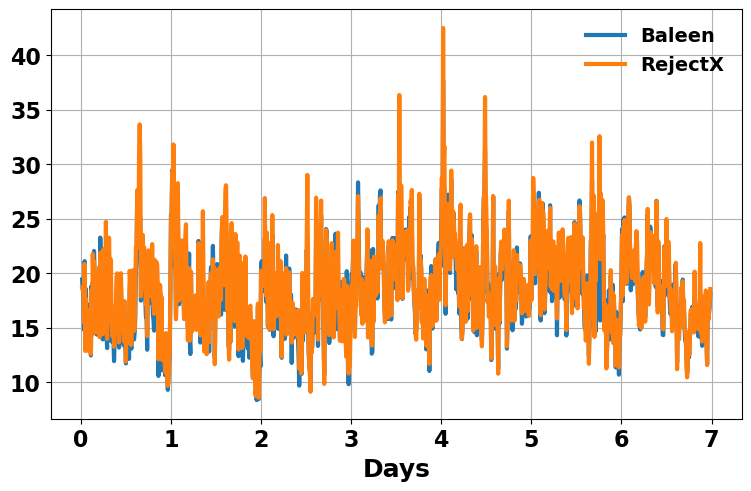

In [83]:
ax = plt.gca()
for label, resv in res.items():
    d_ = res[label].progress['GET+PUT'][600]
    d_['Days'] = d_['Elapsed Trace Time'] / 3600 / 24
    d_.plot(x='Days', y='Util', ax=ax, label=label)
# res['Baleen (ML-Range on Partial-Hit)'].progress['GET+PUT'][600].plot(x='Elapsed Trace Time', y='Util', ax=ax)

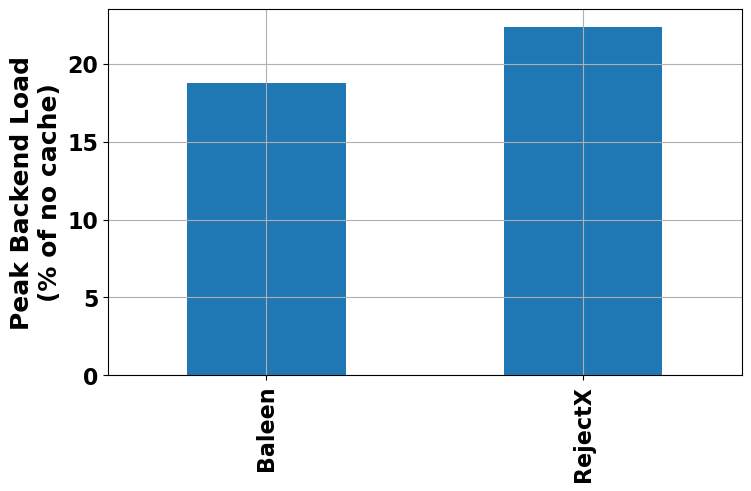

In [71]:
rows = []
for label, resv in res.items():
    resv.summary['Label'] = label
    rows.append(resv.summary)
df = pd.concat(rows)
df['PeakServiceTimeUsedRatio1'] = 1 - df['PeakServiceTimeSavedRatio1']
(df[['Label', 'PeakServiceTimeUsedRatio1']].set_index('Label')['PeakServiceTimeUsedRatio1'] * 100) .plot.bar()
plt.ylabel("Peak Backend Load\n(% of no cache)")
plt.xlabel("")
pass

In [82]:
df_ = (df[['Label', 'PeakServiceTimeUsedRatio1']].set_index('Label'))['PeakServiceTimeUsedRatio1']
print("Savings in Peak Load from Baleen on Region1, Sample 0")
print((1 - df_.loc['Baleen'] / df_.loc['RejectX'])*100)

Savings in Peak Load from Baleen on Region1, Sample 0
16.114302606382612


Missing file for τDT=0.1
Missing file for τDT=0.5
Missing file for τDT=1.0
Missing file for τDT=2.0
Missing file for τDT=5.0


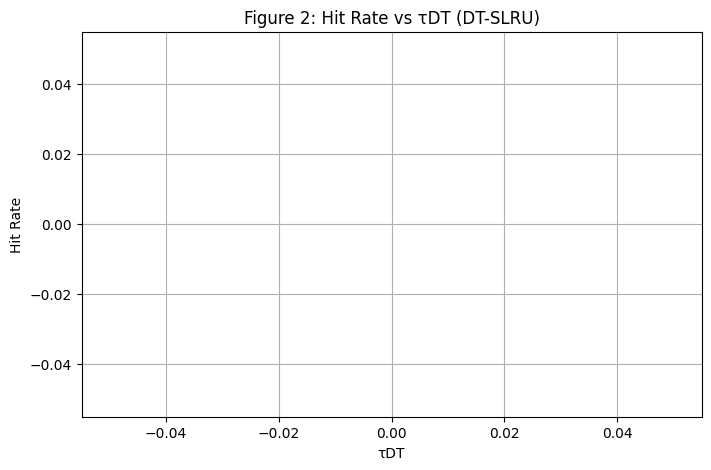

In [1]:

import os
import matplotlib.pyplot as plt

taus = [0.1, 0.5, 1.0, 2.0, 5.0]
hit_rates = []

for tau in taus:
    stats_file = f"../runs/exp_dtslru_2024/20230325_Region5_0_0.1_366.475GB_WR35.599MBS/dtslru_tau_{tau}/rejectx-1_lru_366.475GB/full_0_0.1_cache_perf.txt.stats"
    if os.path.exists(stats_file):
        with open(stats_file, "r") as f:
            for line in f:
                if '"overall_stats.hit_rate"' in line:
                    hit_rate = float(line.strip().split(":")[-1].strip().rstrip(","))
                    hit_rates.append(hit_rate)
                    print(f"τDT={tau} → Hit Rate: {hit_rate}")
                    break
    else:
        print(f"Missing file for τDT={tau}")
        hit_rates.append(None)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(taus, hit_rates, marker='o')
plt.title("Figure 2: Hit Rate vs τDT (DT-SLRU)")
plt.xlabel("τDT")
plt.ylabel("Hit Rate")
plt.grid(True)
plt.show()

[τDT=0.1] Error: [Errno 2] No such file or directory: '../runs/exp_dtslru_2024/20230325_Region5_0_0.1_366.475GB_WR35.599MBS/dtslru_tau_0.1/rejectx-1_lru_366.475GB/full_0_0.1_cache_perf.txt.stats'
[τDT=0.5] Error: [Errno 2] No such file or directory: '../runs/exp_dtslru_2024/20230325_Region5_0_0.1_366.475GB_WR35.599MBS/dtslru_tau_0.5/rejectx-1_lru_366.475GB/full_0_0.1_cache_perf.txt.stats'
[τDT=1.0] Error: [Errno 2] No such file or directory: '../runs/exp_dtslru_2024/20230325_Region5_0_0.1_366.475GB_WR35.599MBS/dtslru_tau_1.0/rejectx-1_lru_366.475GB/full_0_0.1_cache_perf.txt.stats'
[τDT=2.0] Error: [Errno 2] No such file or directory: '../runs/exp_dtslru_2024/20230325_Region5_0_0.1_366.475GB_WR35.599MBS/dtslru_tau_2.0/rejectx-1_lru_366.475GB/full_0_0.1_cache_perf.txt.stats'
[τDT=5.0] Error: [Errno 2] No such file or directory: '../runs/exp_dtslru_2024/20230325_Region5_0_0.1_366.475GB_WR35.599MBS/dtslru_tau_5.0/rejectx-1_lru_366.475GB/full_0_0.1_cache_perf.txt.stats'


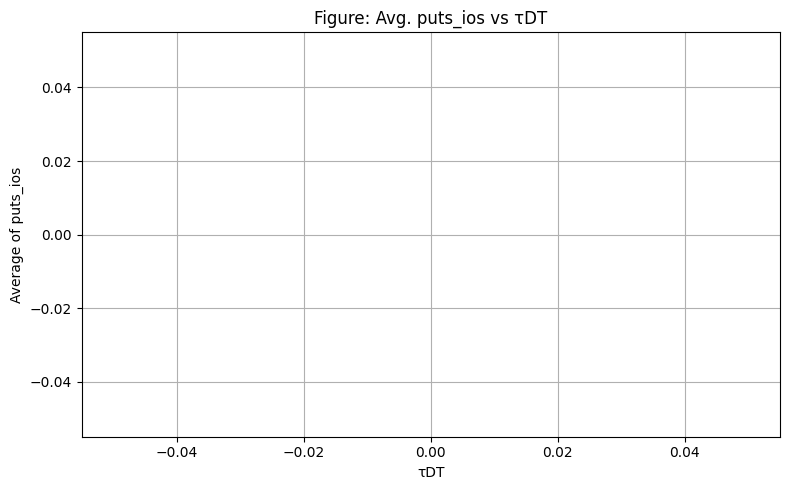

[τDT=0.1] Error: [Errno 2] No such file or directory: '../runs/exp_dtslru_2024/20230325_Region5_0_0.1_366.475GB_WR35.599MBS/dtslru_tau_0.1/rejectx-1_lru_366.475GB/full_0_0.1_cache_perf.txt.stats'
[τDT=0.5] Error: [Errno 2] No such file or directory: '../runs/exp_dtslru_2024/20230325_Region5_0_0.1_366.475GB_WR35.599MBS/dtslru_tau_0.5/rejectx-1_lru_366.475GB/full_0_0.1_cache_perf.txt.stats'
[τDT=1.0] Error: [Errno 2] No such file or directory: '../runs/exp_dtslru_2024/20230325_Region5_0_0.1_366.475GB_WR35.599MBS/dtslru_tau_1.0/rejectx-1_lru_366.475GB/full_0_0.1_cache_perf.txt.stats'
[τDT=2.0] Error: [Errno 2] No such file or directory: '../runs/exp_dtslru_2024/20230325_Region5_0_0.1_366.475GB_WR35.599MBS/dtslru_tau_2.0/rejectx-1_lru_366.475GB/full_0_0.1_cache_perf.txt.stats'
[τDT=5.0] Error: [Errno 2] No such file or directory: '../runs/exp_dtslru_2024/20230325_Region5_0_0.1_366.475GB_WR35.599MBS/dtslru_tau_5.0/rejectx-1_lru_366.475GB/full_0_0.1_cache_perf.txt.stats'


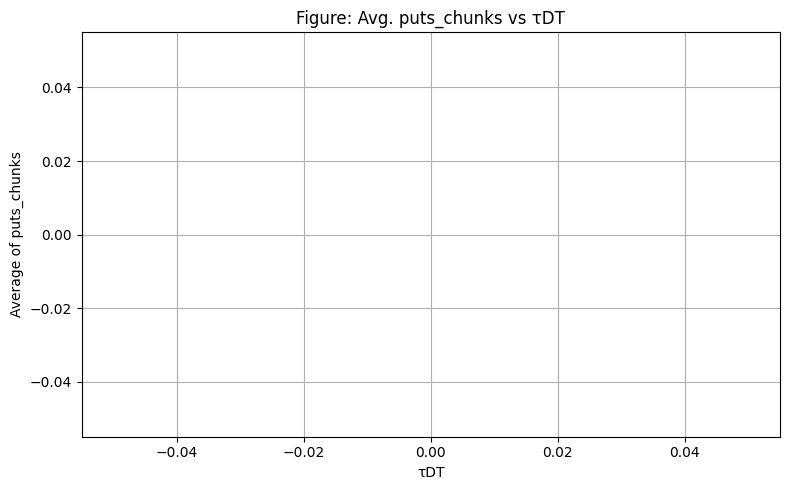

[τDT=0.1] Error: [Errno 2] No such file or directory: '../runs/exp_dtslru_2024/20230325_Region5_0_0.1_366.475GB_WR35.599MBS/dtslru_tau_0.1/rejectx-1_lru_366.475GB/full_0_0.1_cache_perf.txt.stats'
[τDT=0.5] Error: [Errno 2] No such file or directory: '../runs/exp_dtslru_2024/20230325_Region5_0_0.1_366.475GB_WR35.599MBS/dtslru_tau_0.5/rejectx-1_lru_366.475GB/full_0_0.1_cache_perf.txt.stats'
[τDT=1.0] Error: [Errno 2] No such file or directory: '../runs/exp_dtslru_2024/20230325_Region5_0_0.1_366.475GB_WR35.599MBS/dtslru_tau_1.0/rejectx-1_lru_366.475GB/full_0_0.1_cache_perf.txt.stats'
[τDT=2.0] Error: [Errno 2] No such file or directory: '../runs/exp_dtslru_2024/20230325_Region5_0_0.1_366.475GB_WR35.599MBS/dtslru_tau_2.0/rejectx-1_lru_366.475GB/full_0_0.1_cache_perf.txt.stats'
[τDT=5.0] Error: [Errno 2] No such file or directory: '../runs/exp_dtslru_2024/20230325_Region5_0_0.1_366.475GB_WR35.599MBS/dtslru_tau_5.0/rejectx-1_lru_366.475GB/full_0_0.1_cache_perf.txt.stats'


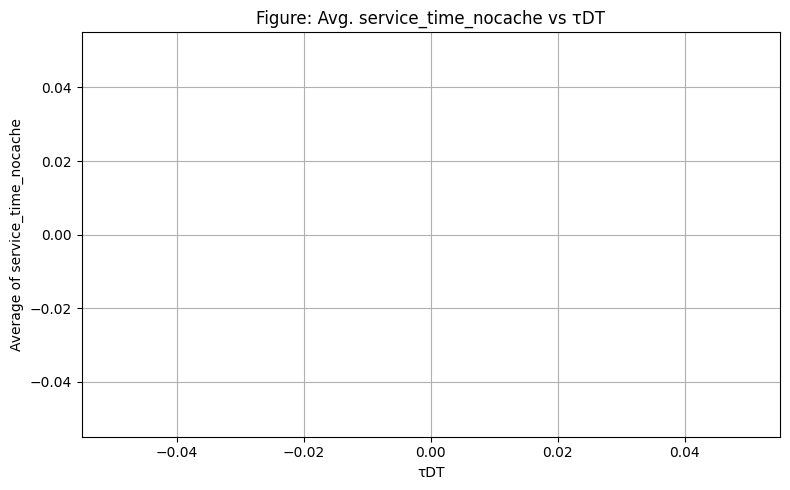

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Correct result file paths for τDT values
result_files = {
    0.1: "../runs/exp_dtslru_2024/20230325_Region5_0_0.1_366.475GB_WR35.599MBS/dtslru_tau_0.1/rejectx-1_lru_366.475GB/full_0_0.1_cache_perf.txt.stats",
    0.5: "../runs/exp_dtslru_2024/20230325_Region5_0_0.1_366.475GB_WR35.599MBS/dtslru_tau_0.5/rejectx-1_lru_366.475GB/full_0_0.1_cache_perf.txt.stats",
    1.0: "../runs/exp_dtslru_2024/20230325_Region5_0_0.1_366.475GB_WR35.599MBS/dtslru_tau_1.0/rejectx-1_lru_366.475GB/full_0_0.1_cache_perf.txt.stats",
    2.0: "../runs/exp_dtslru_2024/20230325_Region5_0_0.1_366.475GB_WR35.599MBS/dtslru_tau_2.0/rejectx-1_lru_366.475GB/full_0_0.1_cache_perf.txt.stats",
    5.0: "../runs/exp_dtslru_2024/20230325_Region5_0_0.1_366.475GB_WR35.599MBS/dtslru_tau_5.0/rejectx-1_lru_366.475GB/full_0_0.1_cache_perf.txt.stats"
}

# τDT values
taus = [0.1, 0.5, 1.0, 2.0, 5.0]

# Metrics to plot
metric_keys = {
    "puts_ios": "puts_ios/ns/1476116018_stats",
    "puts_chunks": "puts_chunks/ns/1476116018_stats",
    "service_time_nocache": "service_time_nocache/ns/1476116012_stats"
}

# Plot each metric
for label, key in metric_keys.items():
    metric_values = []
    for tau in taus:
        try:
            with open(result_files[tau]) as f:
                data = json.load(f)
                values = data.get(key, [])
                if not values:
                    raise ValueError(f"Missing data for key '{key}'")
                avg = np.mean(values)
                metric_values.append(avg)
        except Exception as e:
            print(f"[τDT={tau}] Error: {e}")
            metric_values.append(None)

    # Filter missing data
    taus_filtered = [t for t, v in zip(taus, metric_values) if v is not None]
    values_filtered = [v for v in metric_values if v is not None]

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(taus_filtered, values_filtered, marker='o', linestyle='-')
    plt.title(f"Figure: Avg. {label} vs τDT")
    plt.xlabel("τDT")
    plt.ylabel(f"Average of {label}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
